# Natalia's CNN Vendredi 7 au soir

# Check Dataset

## Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join

In [30]:
os.environ['IMAGE_FOLDER']
#print(os.environ)

'/Users/svinchon/code/NMenacho/To-infinity-and-beyond/data/images_cropped_sample'

In [31]:
image_dir = os.environ['IMAGE_FOLDER']

#image_files = [f for f in listdir(image_dir) if isfile(join(image_dir, f))]

image_files = []
for f in listdir(image_dir):
    print(f)
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []
print(image_files)
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg
1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg
1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg
1237663789028409683_116.929808014175_51.28220380126_GALAXY_0.1862477.jpg
1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg
1237666301632512172_57.5976223070929_0.822063361286141_GALAXY_0.1848572.jpg
1237680275797901779_2.92129873999653_26.7423939900832_GALAXY_0.350847.jpg
1237663782598148618_25.9370141980074_-1.22368504381066_GALAXY_0.2391574.jpg
1237680246816637360_5.46604500701631_20.3671261289832_GALAXY_0.6223869.jpg
1237659154224579580_258.073424808874_23.2493670116733_STAR_-0.0003176941.jpg
1237653652374814984_7.0908370008

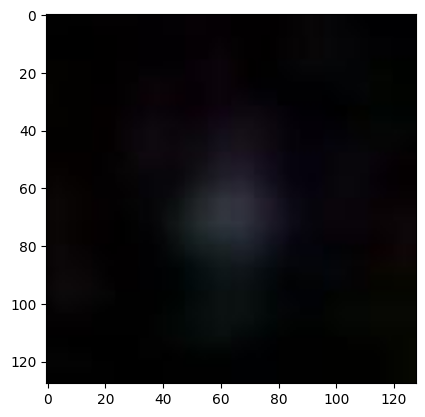

In [32]:
plt.imshow(X_data[3])

In [33]:
#y.value_counts()/len(y)

In [34]:
import pandas as pd
y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat

0       1
1       0
2       1
3       0
4       0
       ..
5430    0
5431    1
5432    0
5433    1
5434    0
Length: 5435, dtype: int64

In [35]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data
y = y_data_cat

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4348, 128, 128, 3), (1087, 128, 128, 3), (4348,), (1087,))

# 1. The Convolutional Neural Network (test1)

### A. Architecture and compilation of a CNN

In [37]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/svinchon/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model_1.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [40]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8135 - loss: 1.8483 - mae: 0.2404 - mse: 0.1607 - precision: 0.8209 - recall: 0.8864 - val_accuracy: 0.8885 - val_loss: 0.5023 - val_mae: 0.3304 - val_mse: 0.1657 - val_precision: 0.8868 - val_recall: 0.9270
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8948 - loss: 0.4492 - mae: 0.2968 - mse: 0.1438 - precision: 0.8753 - recall: 0.9668 - val_accuracy: 0.9161 - val_loss: 0.3098 - val_mae: 0.1812 - val_mse: 0.0837 - val_precision: 0.9189 - val_recall: 0.9389
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9200 - loss: 0.2844 - mae: 0.1576 - mse: 0.0739 - precision: 0.9118 - recall: 0.9555 - val_accuracy: 0.9184 - val_loss: 0.2726 - val_mae: 0.1378 - val_mse: 0.0691 - val_precision: 0.8993 - val_recall: 0.9684
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.9263 - loss: 0.2566 - mae: 0.1372 - mse: 0.0639 - precision: 0.9122 - recall: 0.9694 - val_accuracy: 0.9

In [41]:
!pip freeze | grep keras


keras==2.10.0


In [42]:
model_1.save('../models/model_1.h5')
model_1.save('../models/model_1.keras')

### C. Evaluate model's performance

In [43]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8950 - loss: 0.2581 - mae: 0.1597 - mse: 0.0733 - precision: 0.8716 - recall: 0.9728


[0.2874927520751953,
 0.8859245777130127,
 0.9768518805503845,
 0.8530997037887573,
 0.16847549378871918,
 0.08124317973852158]

### D. Plot loss and accuracy

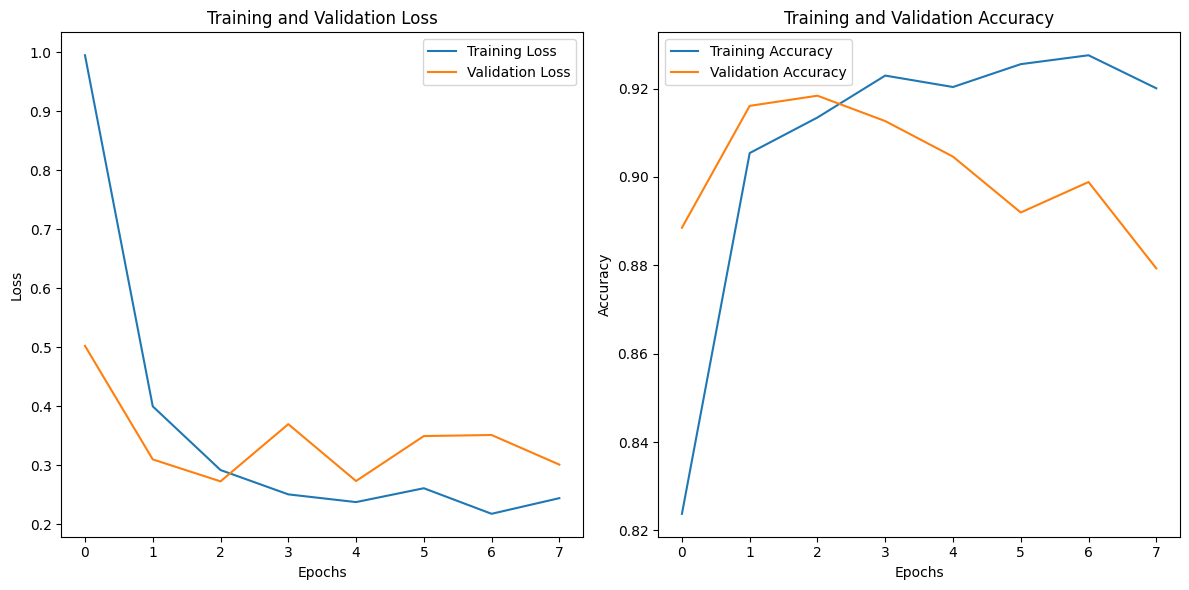

In [44]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 2. The Convolutional Neural Network (other tests)

In [45]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [46]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [47]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.6948 - loss: 1.6771 - mae: 0.4520 - mse: 0.2460 - precision: 0.6828 - recall: 0.9411 - val_accuracy: 0.5828 - val_loss: 0.6851 - val_mae: 0.4951 - val_mse: 0.2460 - val_precision: 0.5828 - val_recall: 1.0000
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5963 - loss: 0.6823 - mae: 0.4934 - mse: 0.2446 - precision: 0.5963 - recall: 1.0000 - val_accuracy: 0.5828 - val_loss: 0.6817 - val_mae: 0.4919 - val_mse: 0.2443 - val_precision: 0.5828 - val_recall: 1.0000
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5987 - loss: 0.6776 - mae: 0.4893 - mse: 0.2422 - precision: 0.5987 - recall: 1.0000 - val_accuracy: 0.5828 - val_loss: 0.6800 - val_mae: 0.4892 - val_mse: 0.2435 - val_precision: 0.5828 - val_recall: 1.0000
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5841 - loss: 0.6793 - mae: 0.4886 - mse: 0.2431 - precision: 0.5841 - recall: 1.0000

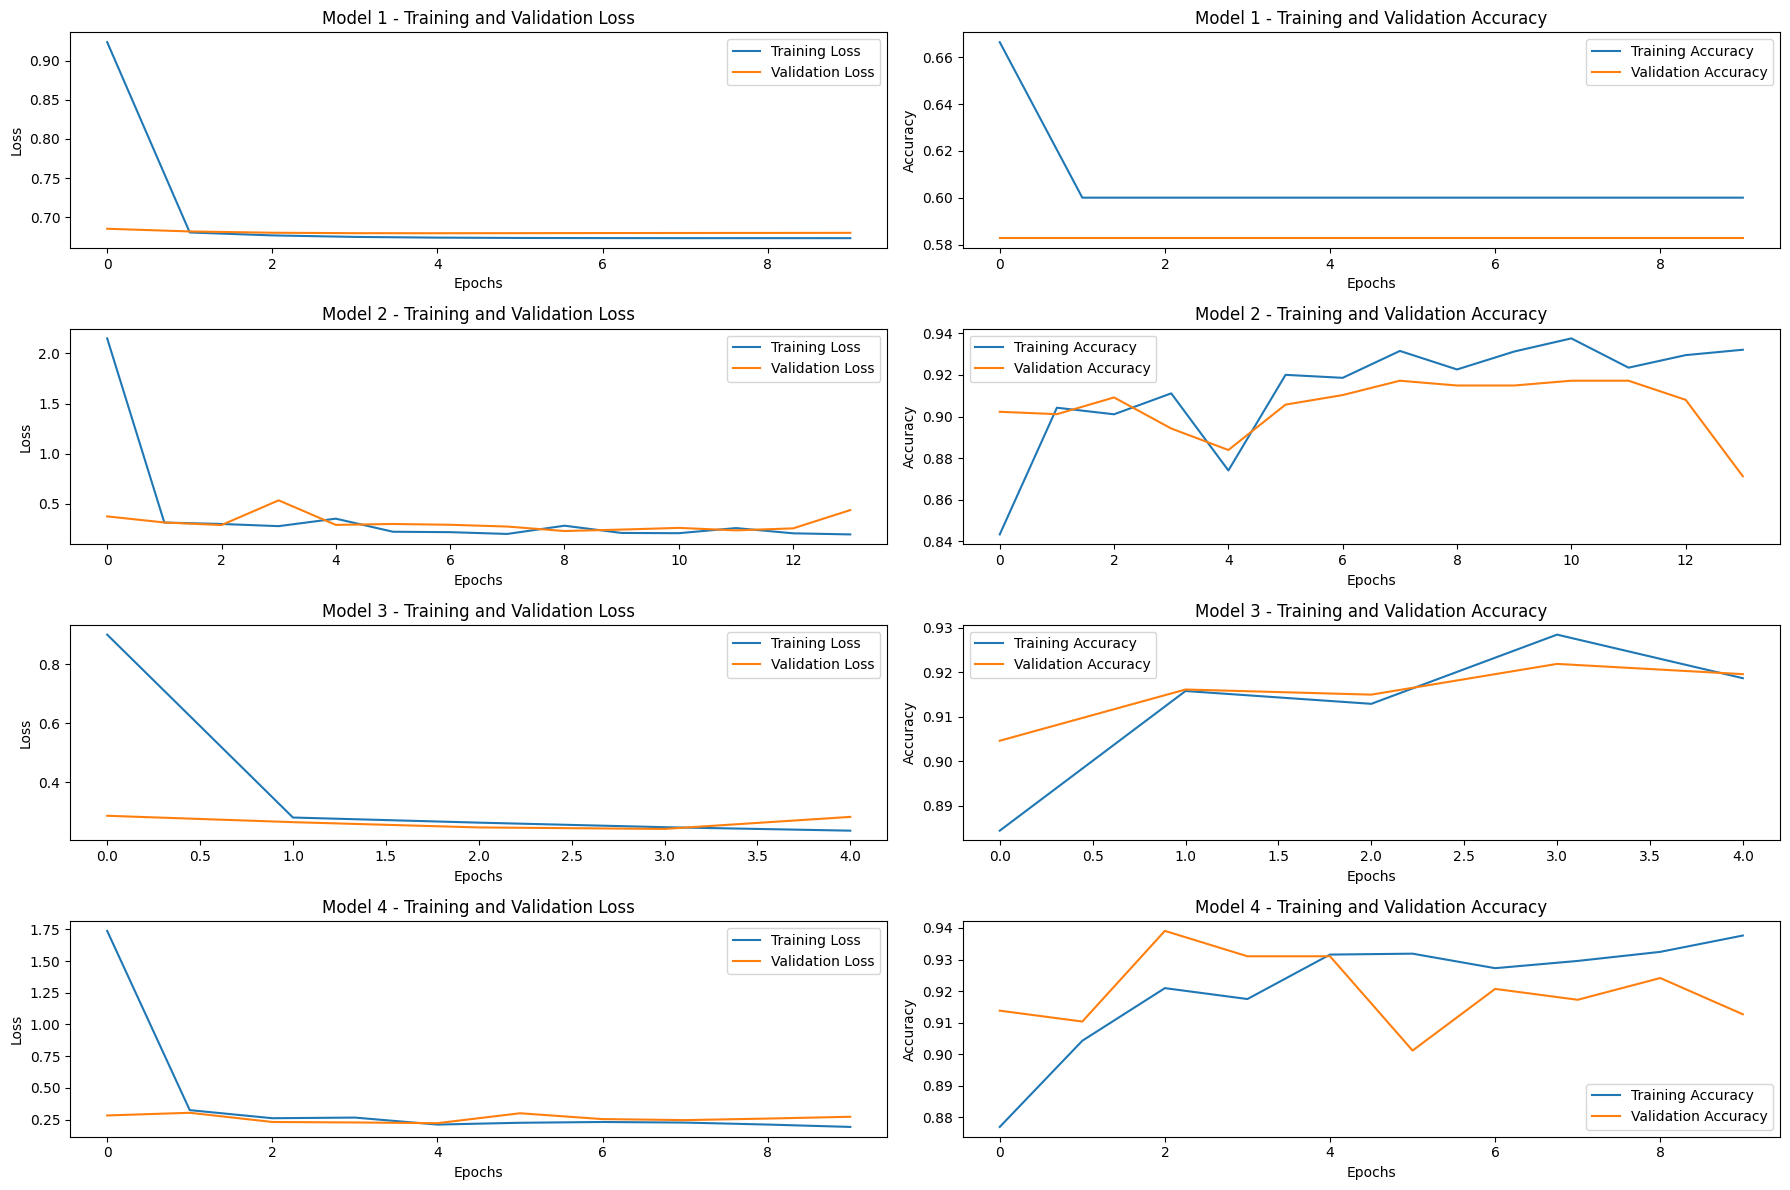

In [48]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [49]:
y_train.value_counts()/len(y_train)

1    0.596596
0    0.403404
Name: count, dtype: float64

## Last model (fingers crossed - final test )

In [3]:
from space_agent.interface.interface_main import create_rotated_images, copy_images_sorted

In [4]:
create_rotated_images()

index: 0 - rc: 0 - RAS
index: 1 - rc: 0 - RAS
index: 2 - rc: 0 - RAS
index: 3 - rc: 0 - RAS
index: 4 - rc: 0 - RAS
index: 5 - rc: 0 - RAS
index: 6 - rc: 0 - rotated copies of 1237663789028409683_116.929808014175_51.28220380126_GALAXY_0.1862477 saved to GALAXY
index: 7 - rc: 0 - RAS
index: 8 - rc: 0 - RAS
index: 9 - rc: 0 - RAS
index: 10 - rc: 0 - RAS
index: 11 - rc: 0 - RAS
index: 12 - rc: 0 - RAS
index: 13 - rc: 0 - RAS
index: 14 - rc: 0 - RAS
index: 15 - rc: 0 - RAS
index: 16 - rc: 0 - RAS
index: 17 - rc: 0 - RAS
index: 18 - rc: 0 - RAS
index: 19 - rc: 0 - RAS
index: 20 - rc: 0 - RAS
index: 21 - rc: 0 - RAS
index: 22 - rc: 0 - rotated copies of 1237658206121427311_182.400493125505_51.0308420141956_GALAXY_0.3829178 saved to GALAXY
index: 23 - rc: 0 - RAS
index: 24 - rc: 0 - RAS
index: 25 - rc: 0 - RAS
index: 26 - rc: 0 - RAS
index: 27 - rc: 0 - RAS
index: 28 - rc: 0 - RAS
index: 29 - rc: 0 - RAS
index: 30 - rc: 0 - rotated copies of 1237661353779724786_179.326641578069_57.872488984685

In [5]:
copy_images_sorted()

index: 0 - image 1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg copied to GALAXY
index: 1 - image 1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg copied to STAR
index: 2 - image 1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg copied to GALAXY
index: 3 - image 1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg copied to STAR
index: 4 - image 1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg copied to STAR
index: 5 - image 1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg copied to STAR
index: 6 - image 1237663789028409683_116.929808014175_51.28220380126_GALAXY_0.1862477.jpg copied to GALAXY
index: 7 - image 1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg copied to STAR
index: 8 - image 1237666301632512172_57.5976223070929_0.822063361286141_GALAXY_0.1848572.jpg copied to GALAXY
index: 9 - image 1237680275797901779_2

### Retrieve information about images

In [6]:
import os
import shutil
import random
def generate_balanced_dataset(galaxy_dir, star_dir, galaxy_aug_dir, star_aug_dir, balanced_dir):
    # Ensure the balanced directory exists
    if not os.path.exists(balanced_dir):
        os.makedirs(balanced_dir)
    # Get the list of files in each directory
    galaxy_files = os.listdir(galaxy_dir)
    star_files = os.listdir(star_dir)
    galaxy_aug_files = os.listdir(galaxy_aug_dir)
    star_aug_files = os.listdir(star_aug_dir)
    # Count the number of images in each directory
    galaxy_count = len(galaxy_files)
    star_count = len(star_files)
    galaxy_aug_count = len(galaxy_aug_files)
    star_aug_count = len(star_aug_files)
    # Copy all original images to the balanced directory
    for file in galaxy_files:
        shutil.copy(os.path.join(galaxy_dir, file), balanced_dir)
    for file in star_files:
        shutil.copy(os.path.join(star_dir, file), balanced_dir)
    if galaxy_aug_count > star_aug_count:
        # Copy all star augmented images to the balanced directory
        for file in star_aug_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)
        # Copy star_aug_count - (galaxy_count - star_count) galaxy augmented images to the balanced directory
        additional_files = random.sample(galaxy_aug_files, star_aug_count - (galaxy_count - star_count))
        for file in additional_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
    else:
        # Copy all galaxy augmented images to the balanced directory
        for file in galaxy_aug_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
        # Copy galaxy_aug_count - (star_count - galaxy_count) star augmented images to the balanced directory
        additional_files = random.sample(star_aug_files, galaxy_aug_count - (star_count - galaxy_count))
        for file in additional_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)

In [7]:
generate_balanced_dataset(
    "../data/images_cropped_sorted/GALAXY",
    "../data/images_cropped_sorted/STAR",
    "../data/images_cropped_from_augmentation/GALAXY",
    "../data/images_cropped_from_augmentation/STAR",
    ".../data/images_final"
)

PermissionError: [Errno 13] Permission denied: '/Users/nataliamenacho'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join

#Create Newdataframe with image_final
image_dir_new = "/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final"


image_files_new = []
for f in listdir(image_dir_new):
    print(f)
    if isfile(os.path.join(image_dir_new, f)):
        if f.endswith(".jpg"):
            image_files_new.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []
print(image_files_new)
for image_file in image_files_new:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir_new,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data_new = np.array(X_list)
print(X_data_new.shape)
y_data_new = np.array(y_list)
print(y_data_new.shape)


1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237665534931239467_240.301221618041_18.9631556767118_STAR_1.040037_90.jpg
1237663782603194608_37.4590453495958_-1.1794841566412_GALAXY_0.2860934_90.jpg
1237673706654859420_123.755881390279_43.3815376157854_STAR_-0.0001686188_90.jpg
1237663782600245312_30.7252790164969_-1.23973260168984_GALAXY_0.09963445_90.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237657401335349673_117.390523174037_28.3419623315302_GALAXY_7.566335E-05_270.jpg
1237661971718078646_175.001395957573_7.47020314544088_GALAXY_0.07972629_180.jpg
1237658206112580179_152.421595498876_46.4217603037237_GALAXY_0.5066113_180.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237650797287834814_132.699086443371_0.949252412404551_GALAXY_0.0004263824_180.jpg
1237657589785493988_180.964889543145_54.4978801142953_STAR_2.082755_90.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.

In [ ]:
import pandas as pd
y_data_cat_new = pd.Series(y_data_new).map({'STAR':0, 'GALAXY':1})
y_data_cat_new

0        1
1        0
2        1
3        0
4        1
        ..
17422    0
17423    1
17424    0
17425    0
17426    0
Length: 17427, dtype: int64

In [ ]:
import pandas as pd
from tensorflow.keras.utils import to_categorical

#df = pd.read_csv('/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data')
X = X_data_new
y = y_data_cat_new

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

Last try with 2 models (the first one and the model_3) using the augmented images

In [ ]:
#Model r2d2: Further increase neurons in the Dense layer
model_r2d2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model c3po: Further increase neurons in the Dense layer
model_c3po = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the models
models = [model_r2d2, model_c3po]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 36s 51ms/step - accuracy: 0.8733 - loss: 0.8884 - mae: 0.2019 - mse: 0.1132 - precision: 0.8674 - recall: 0.9169 - val_accuracy: 0.9183 - val_loss: 0.2702 - val_mae: 0.1551 - val_mse: 0.0690 - val_precision: 0.9090 - val_recall: 0.9487
Epoch 2/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9098 - loss: 0.3174 - mae: 0.1719 - mse: 0.0794 - precision: 0.8984 - recall: 0.9479 - val_accuracy: 0.9154 - val_loss: 0.2587 - val_mae: 0.1467 - val_mse: 0.0697 - val_precision: 0.8821 - val_recall: 0.9795
Epoch 3/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.9178 - loss: 0.2539 - mae: 0.1409 - mse: 0.0666 - precision: 0.9023 - recall: 0.9575 - val_accuracy: 0.9269 - val_loss: 0.2595 - val_mae: 0.1082 - val_mse: 0.0590 - val_precision: 0.9200 - val_recall: 0.9519
Epoch 4/100
697/697 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.9339 - loss: 0.2327 - mae: 0.1197 - mse: 0.0567 - precision: 0.9211 - recall: 0.

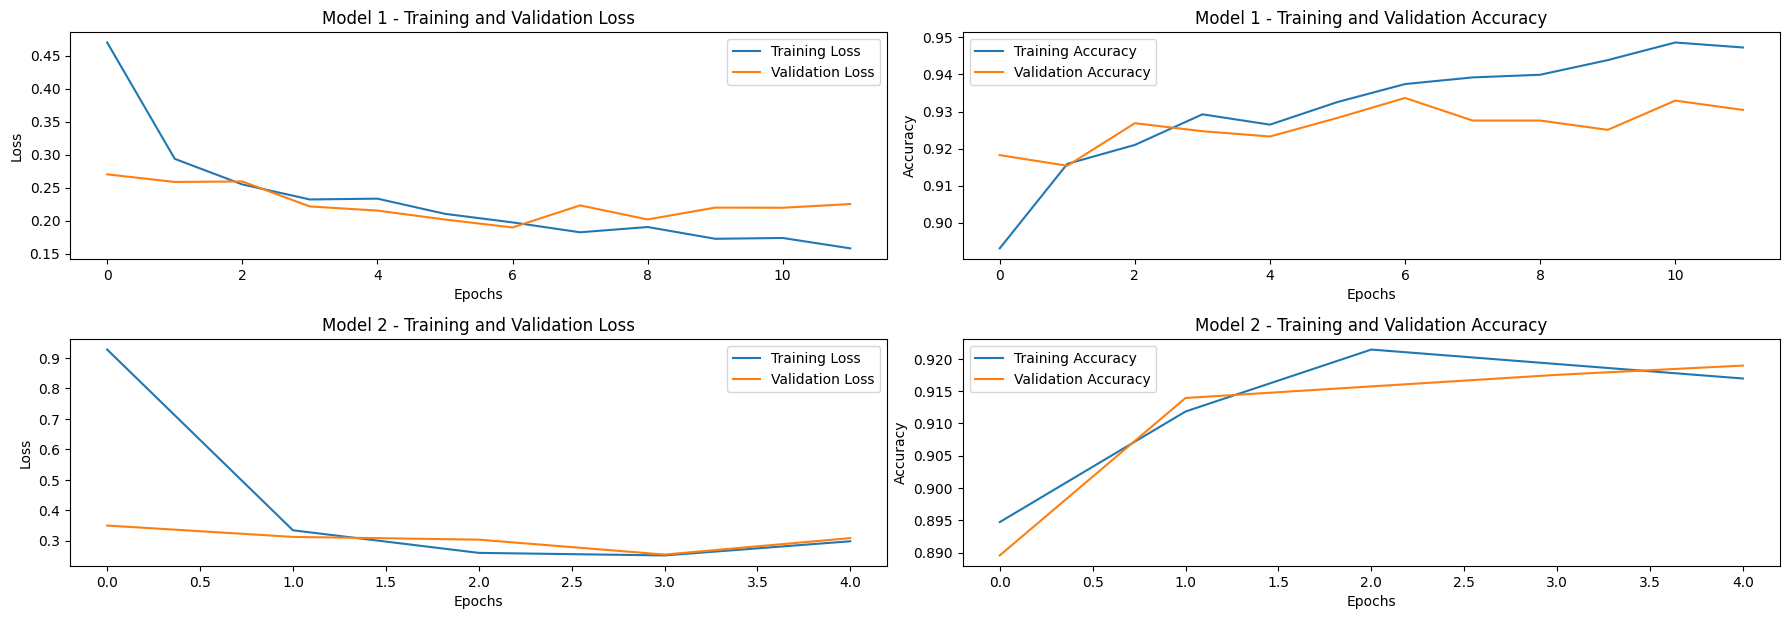

In [ ]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model_r2d2.save('../models/r2d2.keras')
model_r2d2.save('../models/r2d2.h5')

In [ ]:
! pip freeze

absl-py==2.1.0
annotated-types==0.7.0
anyio==4.4.0
appnope==0.1.4
asttokens==2.4.1
astunparse==1.6.3
attrs==23.2.0
beautifulsoup4==4.12.3
bs4==0.0.2
cachetools==5.3.3
certifi==2024.6.2
charset-normalizer==3.3.2
chromedriver-binary-auto==0.3.1
click==8.1.7
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
debugpy==1.8.1
decorator==5.1.1
dnspython==2.6.1
email_validator==2.1.1
exceptiongroup==1.2.1
executing==2.0.1
fastapi==0.111.0
fastapi-cli==0.0.4
flatbuffers==24.3.25
fonttools==4.53.0
gast==0.5.4
google-api-core==2.19.0
google-auth==2.29.0
google-cloud-core==2.4.1
google-cloud-storage==2.16.0
google-crc32c==1.5.0
google-pasta==0.2.0
google-resumable-media==2.7.0
googleapis-common-protos==1.63.1
grpcio==1.64.1
h11==0.14.0
h5py==3.11.0
httpcore==1.0.5
httptools==0.6.1
httpx==0.27.0
idna==3.7
ipykernel==6.29.4
ipython==8.25.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
jupyter_client==8.6.2
jupyter_core==5.7.2
keras==3.3.3
kiwisolver==1.4.5
libclang==18.1.1
Markdown==3.6
markdown

In [ ]:
!pip install tensorflow==2.10.0
!pip install keras==2.10.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.10.0
